In [3]:
cd C:\Users\IITM\Desktop\landsat

C:\Users\IITM\Desktop\landsat


In [11]:
import os
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as xrr
from shapely.geometry import mapping
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

In [12]:
os = xr.load_dataset(r'F:\India_elevation\Osmanabad District\Osmanabad_elevation_clipped.nc')

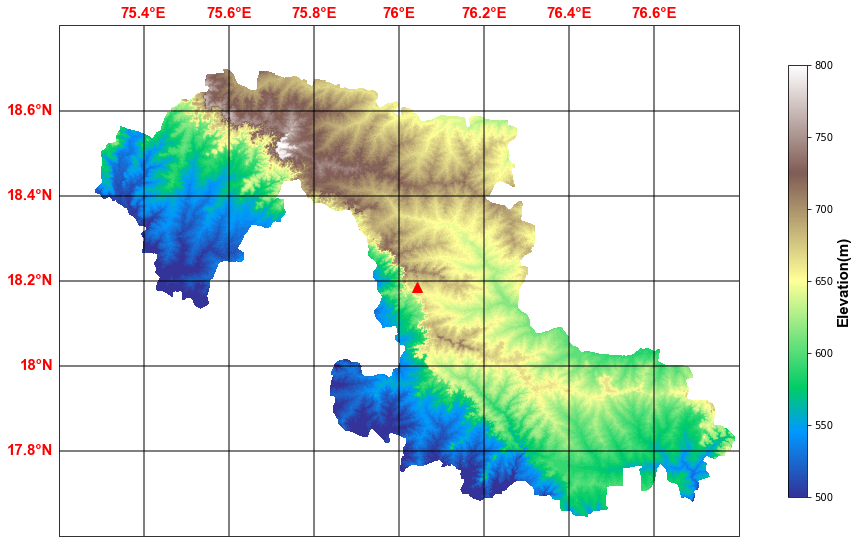

In [16]:
fig=plt.figure(figsize=(13.5,12))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)

lon17 = 76.0420
lat17 = 18.1853
def main():
    ax1 = plt.subplot(1,1, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([75.2,76.8,17.6,18.8], ccrs.PlateCarree())
    ax1.contourf(os.x, os.y, os.band_data[0,:,:],60, transform=ccrs.PlateCarree(),vmin=500,vmax=800,cmap='terrain' )
#     ax1.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
#         path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax1.plot(lon17,lat17,markersize=10,marker='^',color='r')
#     ax1.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
#         path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
#     i= [0,19,43,66,90,114,138,162]
#     for i in i:
#         ax1.plot(lon27[i],lat27[i],marker='^',color='r')
#     ax1.legend(loc=4)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([75.2,75.4,75.6,75.8,76.0,76.2,76.4,76.6,76.8])
    gl.ylocator = mticker.FixedLocator([17.6,17.8,18,18.2,18.4,18.6,18.8])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15,'color': 'red', 'weight': 'bold','fontname':'Arial'}
    gl.ylabel_style = {'size': 15,'color': 'red', 'weight': 'bold','fontname':'Arial'}
if __name__ == '__main__':
    main()
#ax1 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.5]) #(w= >away from map, x= position up and down, y= width of cbar, z = height cb)
im =cbar_ax.pcolor(os.x, os.y, os.band_data[0,:,:] ,cmap='terrain', vmin=500, vmax=800)#,60, vmin=0, vmax=1, cmap='jet')
#fig.colorbar(im, cax=cbar_ax)
#im.colorbar()
#plt.show()

a=fig.colorbar(im, ax = ax, orientation = 'vertical',cax = cbar_ax)

a.set_label(label='Elevation(m)',weight='bold', fontsize=15,fontname='Arial')
# fig.suptitle('Osmanabad Elevation Degital Elevation-SRTM 1 Arc-Second Global Data',y=0.05, fontsize=20,weight='bold',fontname='Arial')
plt.savefig('Osmanabad Elevation.jpg',bbox_inches='tight',dpi=1080)